In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = pd.read_csv('House_Data.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.drop(['area_type', 'society', 'balcony', 'availability'],axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [10]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [13]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df['BHK'] = df['size'].apply(lambda x: int(x.split (' ')[0]))

In [15]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df.drop(['size'],axis = 1, inplace = True)

In [17]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

# From here onwards dropping location just to make a model simplier

In [18]:
df.drop(['location'],axis = 1, inplace = True)

In [19]:
df.head()

,total_sqft,bath,price,BHK
0,1056,2.0,39.07,2
1,2600,5.0,120.00,4
2,1440,2.0,62.00,3
3,1521,3.0,95.00,3
4,1200,2.0,51.00,2


In [20]:
df.describe()

,bath,price,BHK
count,13246.000000,13246.000000,13246.000000
mean,2.692586,112.389392,2.801902
std,1.341506,149.076587,1.295758
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,40.000000,3600.000000,43.000000


In [21]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [23]:
df[df.BHK > 15]

,total_sqft,bath,price,BHK
1718,8000,27.0,230.0,27
3379,2000,16.0,490.0,19
3609,10000,16.0,550.0,16
4684,2400,40.0,660.0,43
11559,1200,18.0,200.0,18


In [24]:
df = df.drop(labels=[4684], axis=0)

In [25]:
df = df.drop(labels=[1718], axis=0)

In [26]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [27]:
df[~df['total_sqft'].apply(is_float)]

,total_sqft,bath,price,BHK
30,2100 - 2850,4.0,186.000,4
122,3067 - 8156,4.0,477.000,4
137,1042 - 1105,2.0,54.005,2
165,1145 - 1340,2.0,43.490,2
188,1015 - 1540,2.0,56.800,2
...,...,...,...,...
12975,850 - 1060,2.0,38.190,2
12990,1804 - 2273,3.0,122.000,3
13059,1200 - 1470,2.0,72.760,2
13265,1133 - 1384,2.0,59.135,2


In [28]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [29]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)

In [30]:
df.corr()

,total_sqft,bath,price,BHK
total_sqft,1.000000,0.401742,0.574736,0.355581
bath,0.401742,1.000000,0.467671,0.888700
price,0.574736,0.467671,1.000000,0.408458
BHK,0.355581,0.888700,0.408458,1.000000


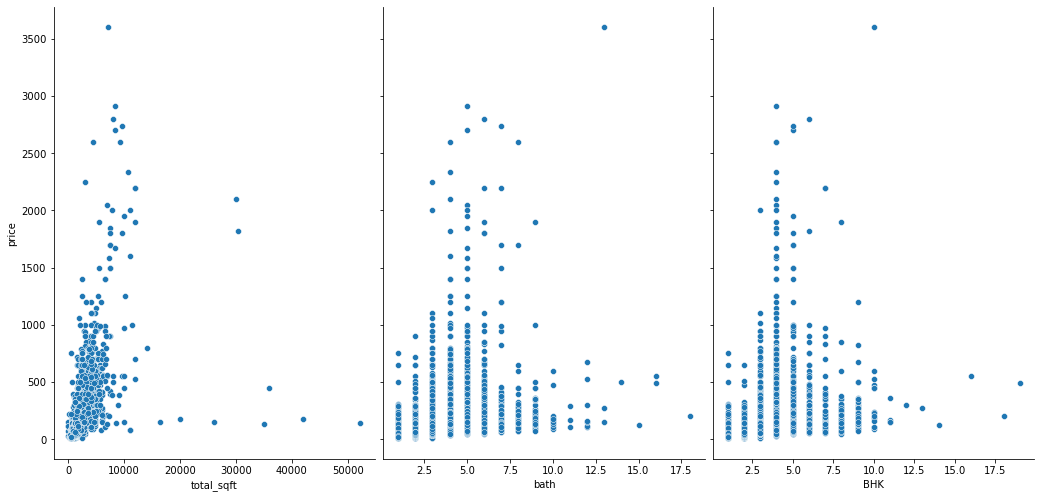

In [31]:
sns.pairplot(df, x_vars = ['total_sqft', 'bath', 'BHK'], y_vars = 'price', height = 7,
            aspect = 0.7, diag_kind = None)

In [32]:
df1 = df.copy()

In [33]:
df1.head()

,total_sqft,bath,price,BHK
0,1056.0,2.0,39.07,2
1,2600.0,5.0,120.00,4
2,1440.0,2.0,62.00,3
3,1521.0,3.0,95.00,3
4,1200.0,2.0,51.00,2


In [34]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df1[['BHK','price']])
y_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [35]:
df1['cluster'] = y_predicted
df.head()

,total_sqft,bath,price,BHK
0,1056.0,2.0,39.07,2
1,2600.0,5.0,120.00,4
2,1440.0,2.0,62.00,3
3,1521.0,3.0,95.00,3
4,1200.0,2.0,51.00,2


In [36]:
df1.head(10)

,total_sqft,bath,price,BHK,cluster
0,1056.0,2.0,39.07,2,0
1,2600.0,5.0,120.00,4,0
2,1440.0,2.0,62.00,3,0
3,1521.0,3.0,95.00,3,0
4,1200.0,2.0,51.00,2,0
5,1170.0,2.0,38.00,2,0
6,2732.0,4.0,204.00,4,0
7,3300.0,4.0,600.00,4,1
8,1310.0,3.0,63.25,3,0
9,1020.0,6.0,370.00,6,1


In [37]:
sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['BHK','price']])
    sse.append(km.inertia_)

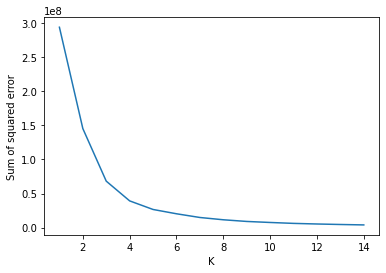

In [38]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [39]:
scaler = MinMaxScaler()

scaler.fit(df1[['price']])
df1['price'] = scaler.transform(df1[['price']])

scaler.fit(df1[['BHK']])
df1['BHK'] = scaler.transform(df1[['BHK']])

In [49]:
df1.head()

,total_sqft,bath,price,BHK,cluster
0,1056.0,2.0,0.008650,0.055556,1
1,2600.0,5.0,0.031180,0.166667,2
2,1440.0,2.0,0.015033,0.111111,2
3,1521.0,3.0,0.024220,0.111111,2
4,1200.0,2.0,0.011971,0.055556,1


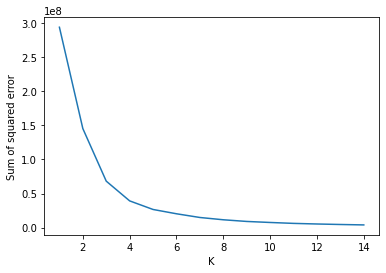

In [40]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [45]:
km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(df1[['BHK','price']])
y_predicted

array([1, 2, 2, ..., 1, 2, 1], dtype=int32)

In [46]:
df1['cluster']=y_predicted
df1.head()

,total_sqft,bath,price,BHK,cluster
0,1056.0,2.0,0.008650,0.055556,1
1,2600.0,5.0,0.031180,0.166667,2
2,1440.0,2.0,0.015033,0.111111,2
3,1521.0,3.0,0.024220,0.111111,2
4,1200.0,2.0,0.011971,0.055556,1


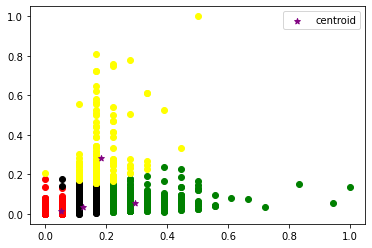

In [48]:
df10 = df1[df1.cluster==0]
df20 = df1[df1.cluster==1]
df30 = df1[df1.cluster==2]
df40 = df1[df1.cluster==3]
plt.scatter(df10.BHK,df10['price'],color='green')
plt.scatter(df20.BHK,df20['price'],color='red')
plt.scatter(df30.BHK,df30['price'],color='black')
plt.scatter(df40.BHK,df40['price'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()